<a href="https://colab.research.google.com/github/RaphaelRAY/airbnb-rating-ml/blob/main/notebooks/00_exploracao_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise Exploratória de Dados Airbnb - Rio de Janeiro

Este notebook tem como objetivo realizar uma análise exploratória dos dados do Airbnb para a cidade do Rio de Janeiro, utilizando os arquivos `listings.csv`, `calendar.csv`, `neighbourhoods.csv` e `neighbourhoods.geojson`.

## 1. Configuração Inicial e Carregamento de Dados

Importação das bibliotecas necessárias e carregamento do dataset principal `listings.csv`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

# Carregando o dataset principal
df = pd.read_csv("https://raw.githubusercontent.com/RaphaelRAY/airbnb-rating-ml/refs/heads/main/data/listings.csv")

## 2. Análise de `listings.csv` — Base Principal

Esta seção foca em entender o perfil dos imóveis, anfitriões e preços.

### Estrutura e Visão Geral

In [2]:
print("\nEstrutura do DataFrame listings:")
df.info()


Estrutura do DataFrame listings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42572 entries, 0 to 42571
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            42572 non-null  int64  
 1   listing_url                                   42572 non-null  object 
 2   scrape_id                                     42572 non-null  int64  
 3   last_scraped                                  42572 non-null  object 
 4   source                                        42572 non-null  object 
 5   name                                          42572 non-null  object 
 6   description                                   41561 non-null  object 
 7   neighborhood_overview                         16513 non-null  object 
 8   picture_url                                   42572 non-null  object 
 9   host_id                    

In [4]:
print("\nPrimeiras 5 linhas do DataFrame listings:")
df.head()


Primeiras 5 linhas do DataFrame listings:


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20250624193519,2025-06-28,city scrape,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Please note that elevated rates apply for New ...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,...,4.91,4.78,4.67,NaN,f,1,1,0,0,1.86
1,25026,https://www.airbnb.com/rooms/25026,20250624193519,2025-07-04,city scrape,Beautiful Modern Decorated Studio in Copacabana,"**Fully renovated in Dec 2022, new kitchen, n...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/7c08fa4f-1d7b...,102840,...,4.93,4.85,4.65,NaN,f,1,1,0,0,1.71
2,35764,https://www.airbnb.com/rooms/35764,20250624193519,2025-06-25,city scrape,COPACABANA SEA BREEZE - RIO - 25 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,...,4.95,4.95,4.89,NaN,f,1,1,0,0,2.88
3,48305,https://www.airbnb.com/rooms/48305,20250624193519,2025-06-26,city scrape,Bright 6bed Penthouse Seconds from Beach,Enter Bossa Nova's history by staying in the v...,Enter Bossa Nova history by staying in the ver...,https://a0.muscache.com/pictures/miso/Hosting-...,70933,...,4.84,4.95,4.59,NaN,t,6,5,1,0,1.05
4,48901,https://www.airbnb.com/rooms/48901,20250624193519,2025-07-01,city scrape,Extra large 4BD 3BT on the AtlanticAve. Copaca...,LARGE Beach side 4 bedrooms 2 Complete bathro...,"Plenty of shops, entertainment andrestaurants<...",https://a0.muscache.com/pictures/hosting/Hosti...,222884,...,4.83,4.94,4.60,NaN,f,1,1,0,0,0.40


### Estatísticas Descritivas

In [5]:
print("\nEstatísticas gerais do DataFrame listings:")
print(df.describe(include="all"))


Estatísticas gerais do DataFrame listings:
                  id                                       listing_url  \
count   4.257200e+04                                             42572   
unique           NaN                                             42572   
top              NaN  https://www.airbnb.com/rooms/1450147164497105593   
freq             NaN                                                 1   
mean    7.837189e+17                                               NaN   
std     5.521959e+17                                               NaN   
min     1.787800e+04                                               NaN   
25%     4.786936e+07                                               NaN   
50%     9.993601e+17                                               NaN   
75%     1.284331e+18                                               NaN   
max     1.450245e+18                                               NaN   

           scrape_id last_scraped       source                     

### Valores Nulos

Identificação dos campos com maior número de valores ausentes.

In [6]:
print("\nValores nulos no DataFrame listings:")
print(df.isna().sum().sort_values(ascending=False).head(20))


Valores nulos no DataFrame listings:
license                         42572
calendar_updated                42572
neighbourhood_group_cleansed    42572
neighbourhood                   26059
neighborhood_overview           26059
host_about                      23175
host_location                    9848
review_scores_location           8630
review_scores_value              8630
review_scores_checkin            8630
review_scores_communication      8630
review_scores_accuracy           8630
review_scores_cleanliness        8629
review_scores_rating             8623
reviews_per_month                8623
last_review                      8623
first_review                     8623
host_response_time               8004
host_response_rate               8004
host_neighbourhood               6520
dtype: int64


### Distribuição de Preço

Visualização da distribuição dos preços por noite. O preço é convertido para formato numérico antes da plotagem.

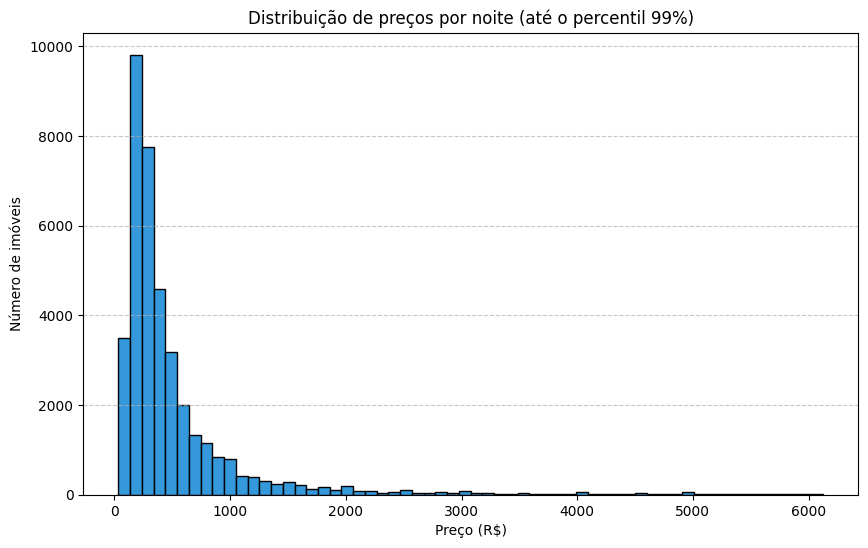

In [10]:
# Limitar o gráfico até o percentil 99
p99 = df["price"].quantile(0.99)

plt.figure(figsize=(10, 6))
plt.hist(df[df["price"] <= p99]["price"], bins=60, color="#3498db", edgecolor="black")
plt.title("Distribuição de preços por noite (até o percentil 99%)")
plt.xlabel("Preço (R$)")
plt.ylabel("Número de imóveis")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

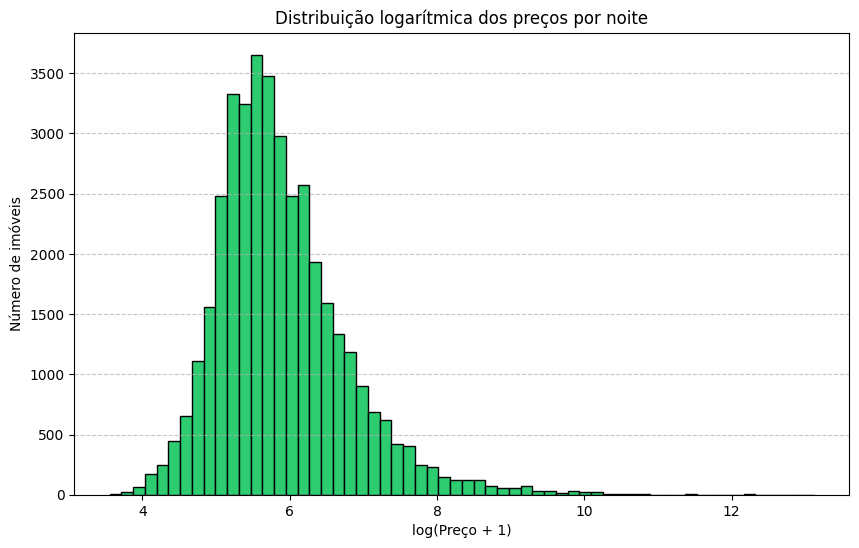

In [14]:
import numpy as np

plt.figure(figsize=(10, 6))
plt.hist(np.log1p(df["price"]), bins=60, color="#2ecc71", edgecolor="black")
plt.title("Distribuição logarítmica dos preços por noite")
plt.xlabel("log(Preço + 1)")
plt.ylabel("Número de imóveis")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

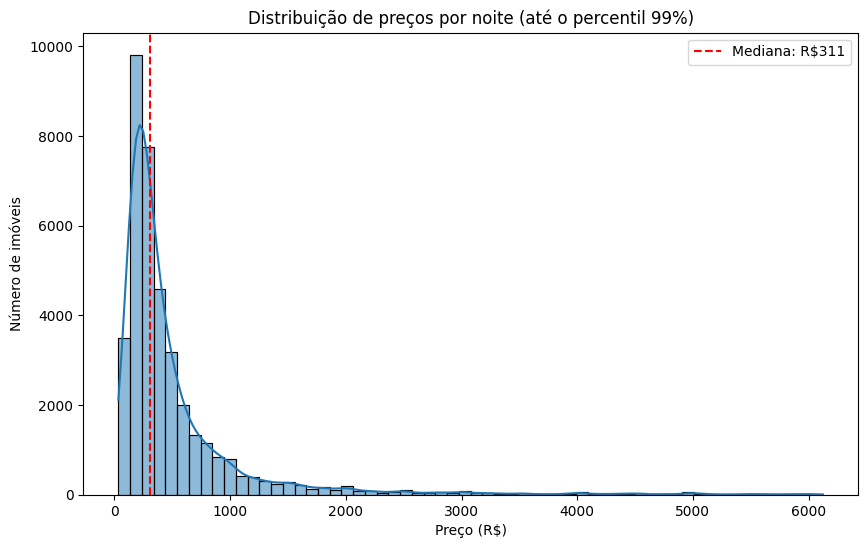

In [13]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df[df["price"] <= p99]["price"], bins=60, kde=True, color="#1f77b4")
plt.axvline(df["price"].median(), color="red", linestyle="--", label=f"Mediana: R${df['price'].median():.0f}")
plt.title("Distribuição de preços por noite (até o percentil 99%)")
plt.xlabel("Preço (R$)")
plt.ylabel("Número de imóveis")
plt.legend()
plt.show()


### Top Bairros

Os bairros com maior número de imóveis listados.

In [15]:
print("\nTop 15 bairros com mais imóveis:")
print(df["neighbourhood_cleansed"].value_counts().head(15))


Top 15 bairros com mais imóveis:
neighbourhood_cleansed
Copacabana                  13099
Barra da Tijuca              3682
Ipanema                      3615
Centro                       2140
Recreio dos Bandeirantes     2109
Botafogo                     1870
Jacarepaguá                  1862
Leblon                       1850
Santa Teresa                 1504
Flamengo                      967
Leme                          860
Camorim                       839
Laranjeiras                   588
São Conrado                   499
Tijuca                        454
Name: count, dtype: int64


### Tipos de Hospedagem

Distribuição dos tipos de quartos disponíveis.

In [17]:
print("\nTipos de hospedagem:")
print(df["room_type"].value_counts())


Tipos de hospedagem:
room_type
Entire home/apt    33990
Private room        8152
Shared room          407
Hotel room            23
Name: count, dtype: int64


## 3. Análise de `calendar.csv` — Disponibilidade e Comportamento

Esta seção visa obter indicadores médios de ocupação e preços ao longo do tempo.

In [31]:
#print("\n--- Análise de calendar.csv ---")
# Explicitly read 'listing_id', 'price', and 'available' as strings
#cal = pd.read_csv("/content/calendar.csv")


--- Análise de calendar.csv ---


/tmp/ipython-input-1664155416.py:3: DtypeWarning: Columns (0,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  cal = pd.read_csv("/content/calendar.csv", usecols=[



Number of rows after cleaning: 0

Resumo do calendário por imóvel:
Empty DataFrame
Columns: [avg_price, availability_ratio, avg_minimum_nights, avg_maximum_nights]
Index: []


## 4. Análise de `neighbourhoods.csv` — Contexto Geográfico

Entendimento dos agrupamentos e padronização de bairros.

In [32]:
print("\n--- Análise de neighbourhoods.csv ---")
neigh = pd.read_csv("https://raw.githubusercontent.com/RaphaelRAY/airbnb-rating-ml/refs/heads/main/data/neighbourhoods.csv")
print("\nPrimeiras 5 linhas do DataFrame neighbourhoods:")
print(neigh.head())
print("\nContagem de valores para neighbourhood_group:")
print(neigh["neighbourhood_group"].value_counts())


--- Análise de neighbourhoods.csv ---

Primeiras 5 linhas do DataFrame neighbourhoods:
   neighbourhood_group      neighbourhood
0                  NaN           Abolição
1                  NaN              Acari
2                  NaN         Água Santa
3                  NaN  Alto da Boa Vista
4                  NaN           Anchieta

Contagem de valores para neighbourhood_group:
Series([], Name: count, dtype: int64)


## 5. Análise de `neighbourhoods.geojson` — Visualização no Mapa

Plotagem de mapas para verificar a concentração geográfica dos imóveis.


--- Análise de neighbourhoods.geojson ---


<Figure size 1200x1000 with 0 Axes>

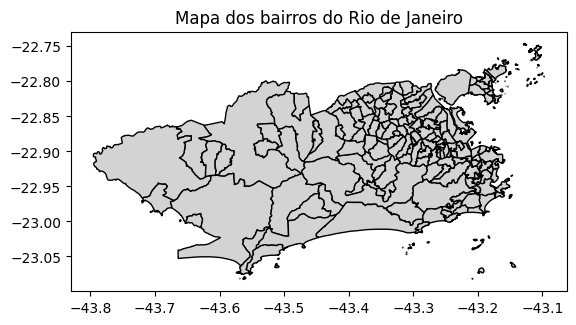

Mapa dos bairros salvo como rio_neighbourhoods_map.png


In [35]:
print("\n--- Análise de neighbourhoods.geojson ---")
geo = gpd.read_file("https://raw.githubusercontent.com/RaphaelRAY/airbnb-rating-ml/refs/heads/main/data/neighbourhoods.geojson")
plt.figure(figsize=(12, 10))
geo.plot(color="lightgray", edgecolor="black")
plt.title("Mapa dos bairros do Rio de Janeiro")
#plt.savefig("rio_neighbourhoods_map.png")
plt.show()

<Figure size 1200x1000 with 0 Axes>

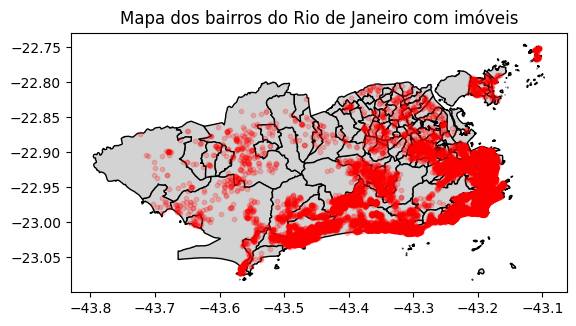

Mapa dos bairros com imóveis salvo como rio_neighbourhoods_map_with_listings.png


In [38]:
# Sobrepondo imóveis no mapa
plt.figure(figsize=(12, 10))
geo.plot(color="lightgray", edgecolor="black")
plt.scatter(df["longitude"], df["latitude"], alpha=0.2, s=10, color="red")
plt.title("Mapa dos bairros do Rio de Janeiro com imóveis")
#plt.savefig("rio_neighbourhoods_map_with_listings.png")
plt.show()
